In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
url = 'https://github.com/datasciencedojo/datasets/raw/master/titanic.csv'
titanic = pd.read_csv(url)

# Preprocess the data
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
titanic['Age'].fillna(value=titanic['Age'].mean(), inplace=True)
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic.dropna(inplace=True)

# Split the dataset into training and testing sets
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch 1/100
18/18 [==============================] - 1s 14ms/step - loss: 4.0601 - accuracy: 0.6169 - val_loss: 2.1223 - val_accuracy: 0.6503
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 1.7421 - accuracy: 0.5712 - val_loss: 0.8852 - val_accuracy: 0.5105
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.8517 - accuracy: 0.5378 - val_loss: 0.7850 - val_accuracy: 0.5944
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.7357 - accuracy: 0.6309 - val_loss: 0.6685 - val_accuracy: 0.6294
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.6450 - val_loss: 0.6422 - val_accuracy: 0.6154
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.6450 - val_loss: 0.6360 - val_accuracy: 0.6224
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6509 - accuracy: 0.6380 - val_loss: 0.6300 - val_accuracy: 0.6364
Epoch 8/100


c:\Users\gjurado\AppData\Local\Continuum\anaconda3\envs\mihr\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


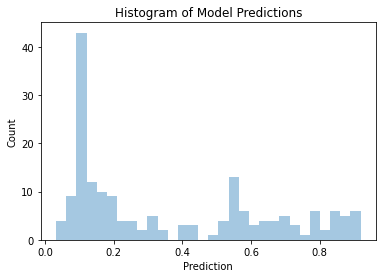

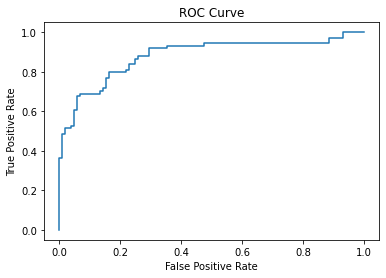

AUC Score: 0.8812097812097812
Best threshold: 0.3392092287540436


In [2]:

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(6,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, validation_split=0.2)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot a histogram of the predictions
sns.distplot(y_pred, kde=False, bins=30)
plt.xlabel("Prediction")
plt.ylabel("Count")
plt.title("Histogram of Model Predictions")
plt.show()

# Calculate the FPR, TPR, and threshold values for different threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {auc_score}")

# Find the best threshold based on the ROC curve
best_threshold = thresholds[np.argmax(tpr - fpr)]
print(f"Best threshold: {best_threshold}")


6/6 [==============================] - 0s 1ms/step
Accuracy: 0.821


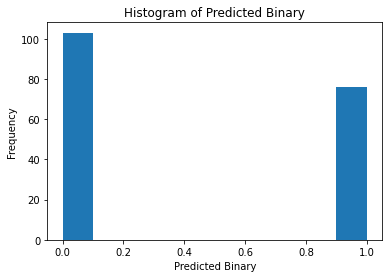

In [3]:
# Create a Lambda layer that converts model outputs to binary using the best threshold
binary_layer = tf.keras.layers.Lambda(lambda x: tf.where(x < best_threshold, 0, 1))(model.output)

# Create a new model that outputs the binary layer
binary_model = tf.keras.Model(inputs=model.input, outputs=binary_layer)

# Make predictions using the binary model
y_pred_binary = binary_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = np.mean(y_pred_binary.ravel() == y_test)
print(f"Accuracy: {accuracy:.3f}")

# Plot the histogram of binary predictions
plt.hist(y_pred_binary)
plt.xlabel("Predicted Binary")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Binary")
plt.show()

In [4]:
binary_model.save("titanic_model")

INFO:tensorflow:Assets written to: titanic_model\assets
